In [1]:
import pandas as pd
import scipy.io

mat_path = r"C:\Users\aliss\Documents\Repo_modelos\pythonProject\TAREAS\Coactivation_matrix.mat"

mat_json = scipy.io.loadmat(mat_path)
data = mat_json['Coactivation_matrix']

1. Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas.

In [2]:
df = pd.DataFrame(data)
df.index = df.index + 1  #índices desde 1 
df.columns = df.columns + 1  #columnas desde 1 
print(df)

          1         2         3         4         5        6         7    \
1    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
2    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
3    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
5    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
634  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
635  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
636  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
637  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
638  0.101124  0.069231  0.000000  0.000000  0.053279  0.00000  0.000000   

          8    9         10   ...  629       630  631  632       633  \
1    0.000000  

2. Mostrar el heatmap de coativation_matrix

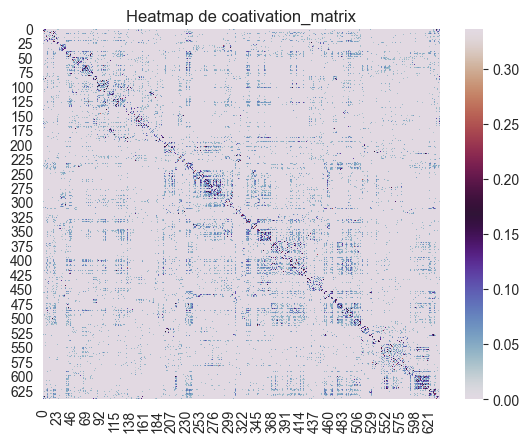

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data, cmap='twilight')
plt.title('Heatmap de coativation_matrix')

plt.show()

3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30.

In [4]:
df = pd.DataFrame(data)

#establecemos el rango de nuestro dataframe inicial al dataframe subconjunto
subset = df.iloc[9:30, 9:30] 

#Para evitar el cero-indexado que toma iloc:
subset.index = range(10,31)
subset.columns = range(10,31)
print(subset)

          10        11        12        13        14        15        16  \
10  0.000000  0.054299  0.145251  0.000000  0.103286  0.000000  0.000000   
11  0.054299  0.000000  0.075000  0.035556  0.000000  0.000000  0.140940   
12  0.145251  0.075000  0.000000  0.000000  0.000000  0.053435  0.059701   
13  0.000000  0.035556  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.103286  0.000000  0.000000  0.000000  0.000000  0.043478  0.055215   
15  0.000000  0.000000  0.053435  0.000000  0.043478  0.000000  0.000000   
16  0.000000  0.140940  0.059701  0.000000  0.055215  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.036697  0.034398  0.000000  0.000000   
18  0.068627  0.107784  0.000000  0.033175  0.087209  0.034247  0.115108   
19  0.000000  0.046414  0.032864  0.170833  0.037344  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000

4. Mostrar el heatmap del nuevo dataframe

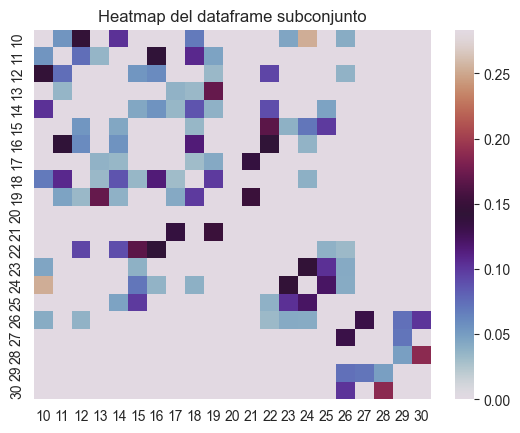

In [5]:
sns.heatmap(subset, cmap='twilight')
plt.title('Heatmap del dataframe subconjunto')
plt.show()

5. Crear el grafo dirigido del nuevo dataframe

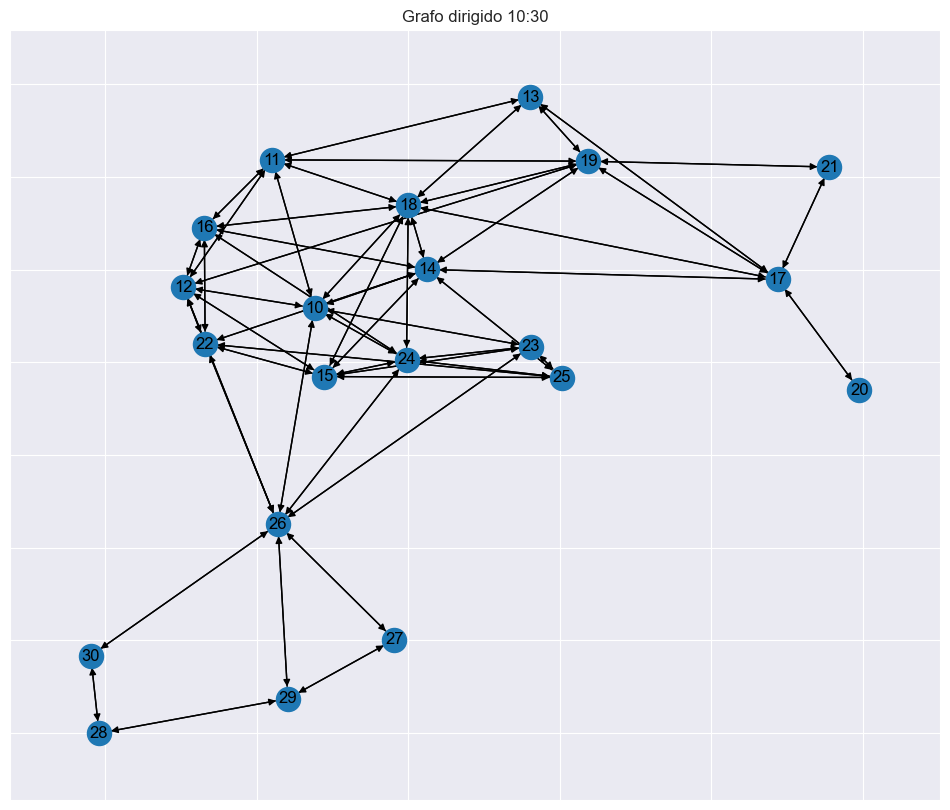

In [6]:
import networkx as nx
df_grafo = pd.DataFrame(subset)
G_grafo = nx.from_pandas_adjacency(df_grafo, create_using=nx.DiGraph())

plt.figure(figsize = (12,10))
pos = nx.spring_layout(G_grafo)
nx.draw_networkx(G_grafo, pos=pos, with_labels=True)

plt.title('Grafo dirigido 10:30')
plt.show()

6. ¿Qué nodo tiene más conexiones del nuevo dataframe?

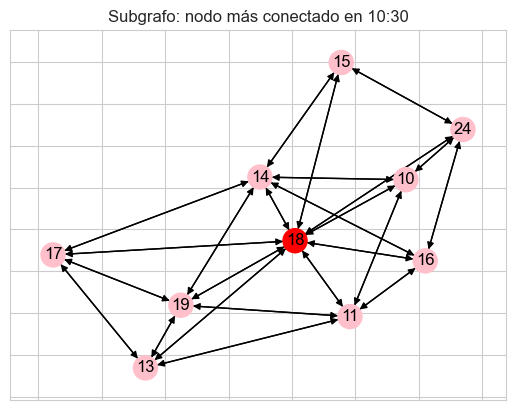

In [94]:
#El nodo que tiene más conexiones es el nodo 18 
G = G_grafo.copy()
nodo_mas_conectado = max(G.degree, key=lambda x: x[1])[0]

grafo_nodo = G.subgraph([nodo_mas_conectado] + list(G.successors(nodo_mas_conectado)) + list(G.predecessors(nodo_mas_conectado)))

pos = nx.spring_layout(grafo_nodo)
#Para ponerle colorcito al nodo más conectado
color_nodo = ['red' if node == nodo_mas_conectado else 'pink' for node in grafo_nodo]

nx.draw_networkx(grafo_nodo, pos=pos, with_labels=True, node_color=color_nodo)

plt.title('Subgrafo: nodo más conectado en 10:30')
plt.show()

7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)



In [8]:
df = pd.DataFrame(data)
quantiles = df.quantile([0.25, 0.5, 0.75], axis=0) 
print(quantiles)

      0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      631  632  633  634  635  636  637  
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 638 columns]


1. Filtre el dataframe usando como threshold los quantiles 0.25 y 0.5, cómo queda la matriz de activación filtrada?

In [9]:
#filtrado
filtrado_df = quantiles[(quantiles > quantiles.loc[0.25]) & ( quantiles < quantiles.loc[0.5])].dropna()

print(filtrado_df)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 638 columns]


Del archivo fve32.mat

In [10]:
math_path = r"C:\Users\aliss\Documents\Repo_modelos\pythonProject\TAREAS\fve32.mat"
math_data = scipy.io.loadmat(math_path)
math_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

1. Muestra el heatmap de la matriz de activación

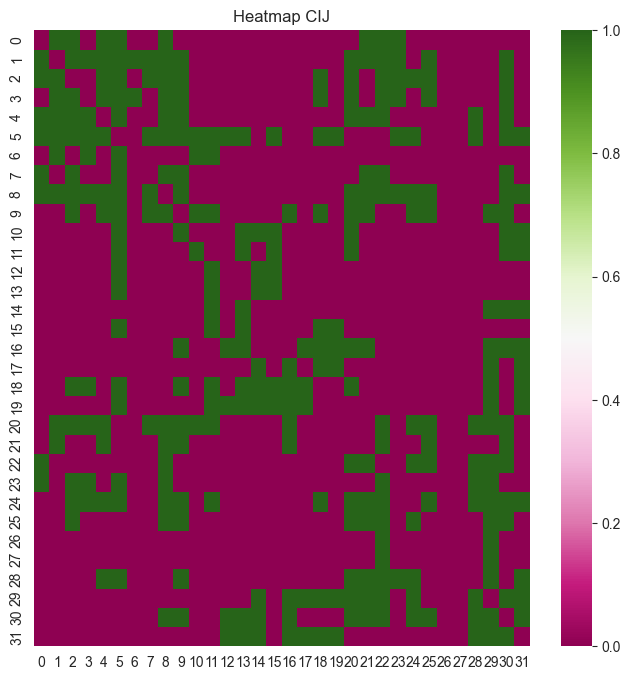

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

names = math_data["Names"]
cij_matrix = math_data["CIJ"]
names_type, names_shape = type(names), names.shape
cij_type, cij_shape = type(cij_matrix), cij_matrix.shape
names_list = [str(name[0]) for name in names]
plt.figure(figsize=(8,8))
sns.heatmap(cij_matrix,vmin=0,vmax=1,cmap="PiYG",)
plt.title("Heatmap CIJ")
plt.show()

2. Utilizando los nombres del archivo.mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

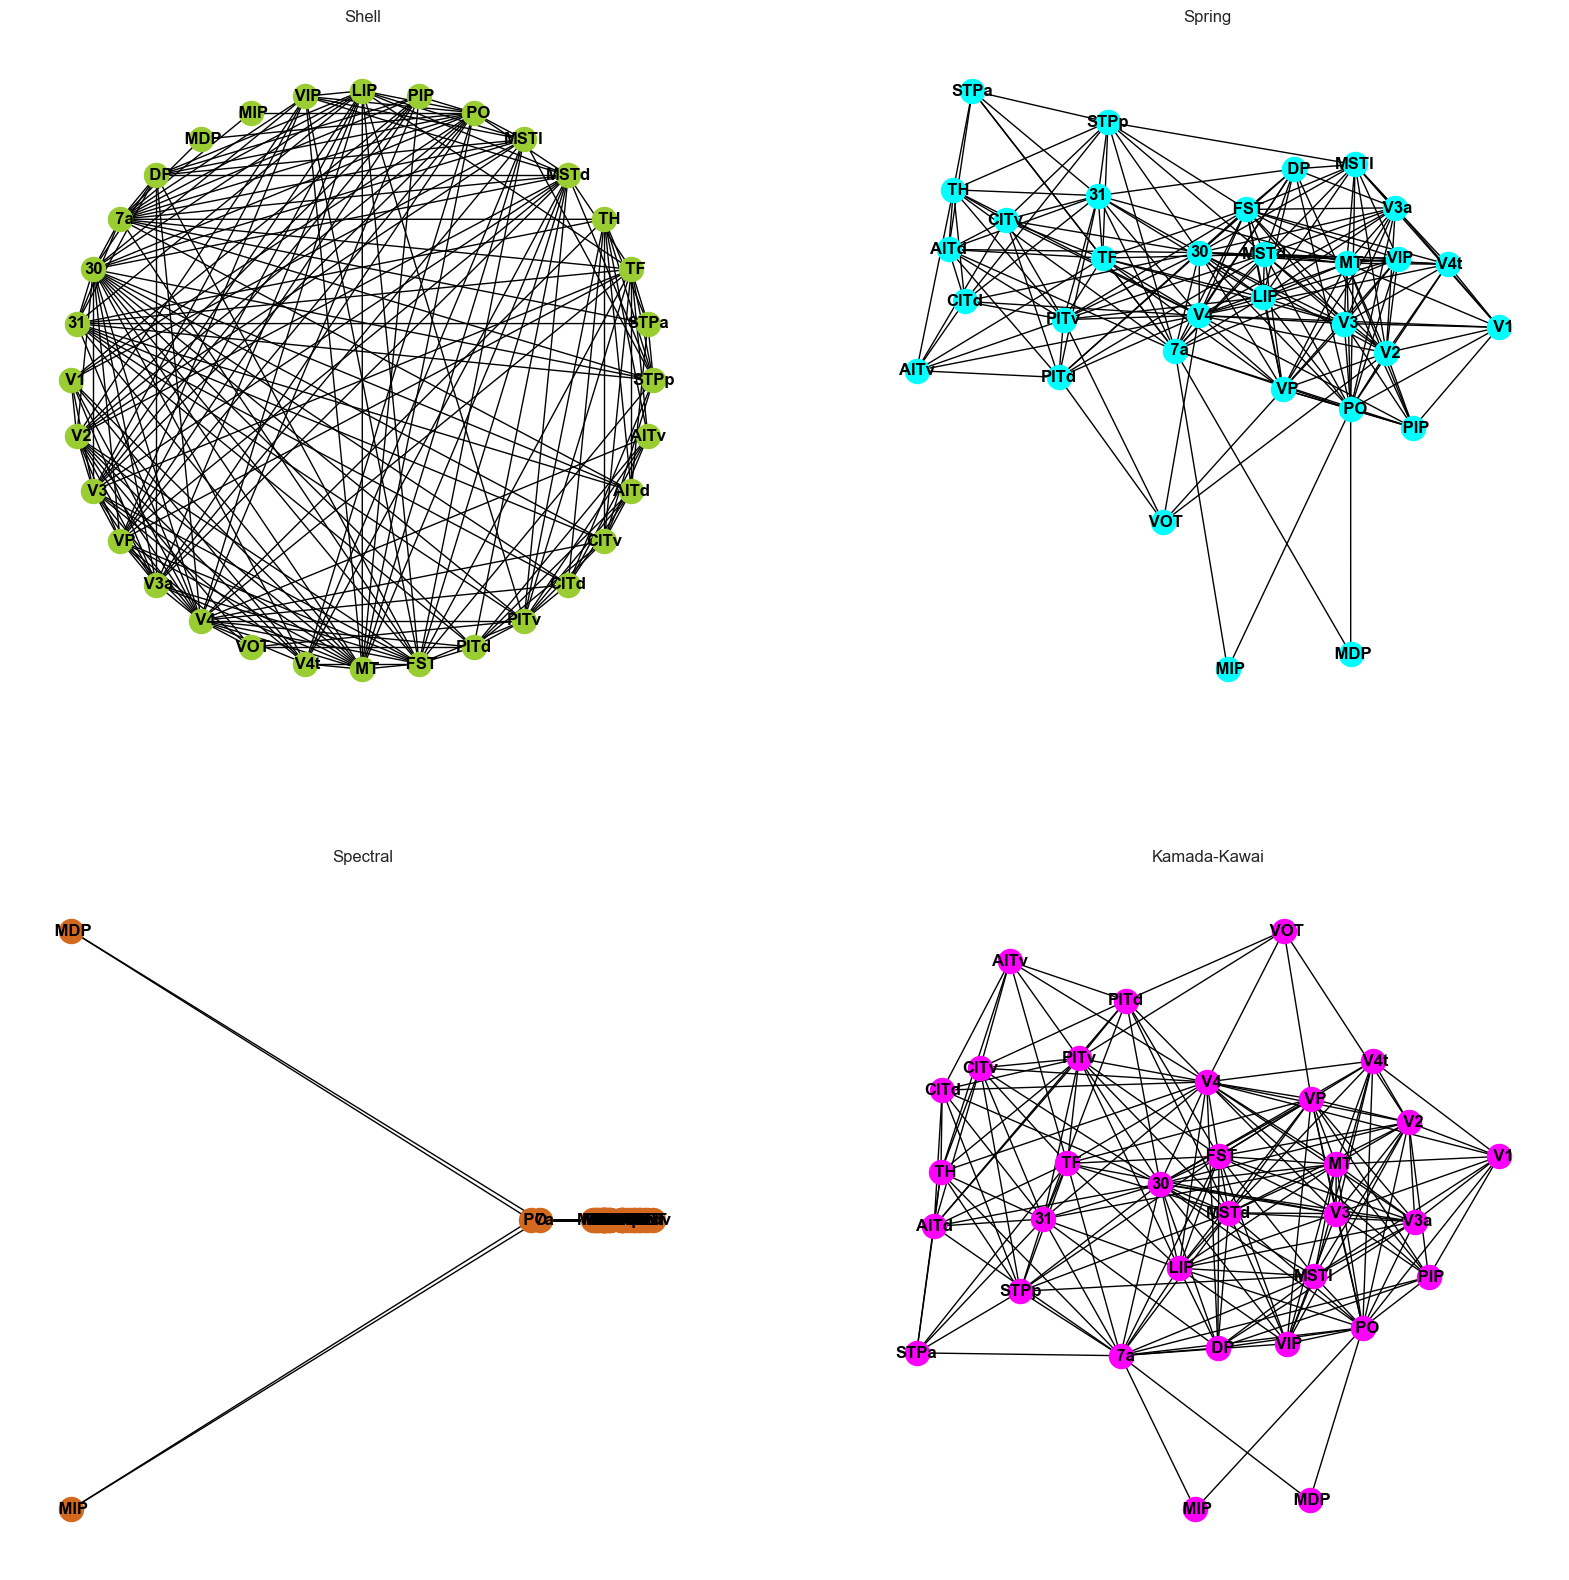

In [97]:
G = nx.from_numpy_array(cij_matrix)

G.edges(data=True)
node_labels = {idx: names[idx] for idx in range(30)}
H = nx.relabel_nodes(G, node_labels)

plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
nx.draw_shell(H, with_labels=True, node_color="yellowgreen", font_weight='bold')
plt.title("Shell")

plt.subplot(2, 2, 2)
nx.draw_spring(H, with_labels=True, node_color="aqua", font_weight='bold')
plt.title("Spring")

plt.subplot(2, 2, 3)
nx.draw_spectral(H, with_labels=True, node_color="chocolate", font_weight='bold')
plt.title("Spectral")

plt.subplot(2, 2, 4)
nx.draw_kamada_kawai(H, with_labels=True, node_color="fuchsia", font_weight='bold')
plt.title("Kamada-Kawai")

plt.show()

3. Determina el nodo con mayores conexiones

In [37]:
import numpy as np 

grados = np.sum(cij_matrix,axis=1)
max_index = np.argmax(grados) 
max_value = grados[max_index]
nombre_nodo = names[max_index]

print('Nodo:', max_index,'\nNombre:',nombre_nodo, '\nGrado:',max_value)

Nodo: 5 
Nombre:   V4 
Grado: 20


4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

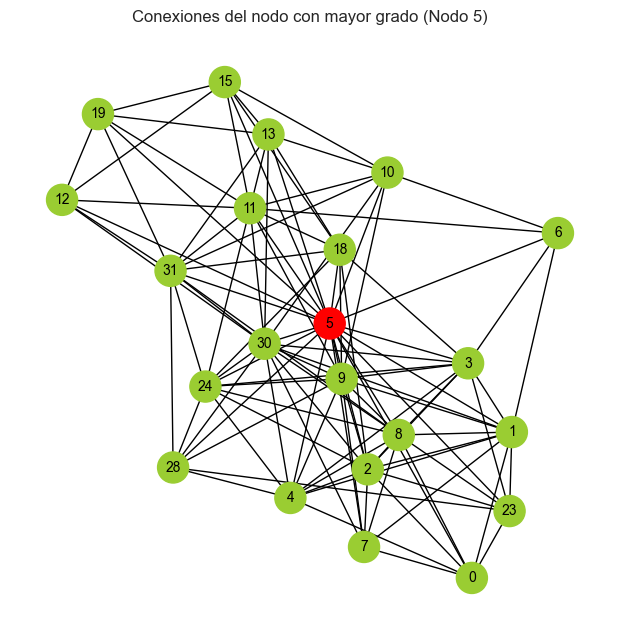

In [98]:
G = nx.from_numpy_array(cij_matrix)

nodov4 = np.argmax(np.sum(cij_matrix, axis=1))

# Crear el subgrafo del nodo y sus vecinos
grafov4 = [nodov4] + list(G.neighbors(nodov4))
subgrafov4 = G.subgraph(grafov4)

# Dibujar el subgrafo
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(subgrafov4)  # Diseño del subgrafo

# Configurar colores: nodo principal en rojo, vecinos en azul
node_colors = ["red" if node == nodov4 else "yellowgreen" for node in subgrafov4.nodes()]

# Dibujar el subgrafo con colores y etiquetas de nodos
nx.draw(subgrafov4, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color="black")
plt.title(f"Conexiones del nodo con mayor grado (Nodo {nodov4})")
plt.show()


Ejercicio 
1. Generar un numero aleatorio entero en el rango [-3,3] con seed=5002

In [99]:
import random
random.seed(5002)
entero_aleatorio=random.randint(-3,3)
entero_aleatorio

2

2. Generar un número aleatorio flotante en el rango [-10.10] con seed=5002


In [100]:
import random
random.seed(5002)
flotante_aleatorio=random.uniform(-10,10)
flotante_aleatorio

2.756897507517177

3. Generar un array de 1000 números con distribución normal, con mu=ej1, y sigma=ej2

In [101]:
import numpy as np
mu =entero_aleatorio
sigma = flotante_aleatorio
data = np.random.normal(mu, sigma, 1000)
data

array([ 1.87975050e+00,  5.71868696e+00,  3.17031969e+00,  2.64829907e+00,
        4.67480173e+00, -2.95933432e+00,  3.20729788e+00,  2.02653898e+00,
        9.76030192e-01, -1.41948229e+00, -2.12595113e+00, -5.48456210e+00,
        9.68210607e-01,  4.19980655e+00,  4.69762882e-01, -3.00388836e+00,
       -4.18544027e-01,  2.06805520e+00, -3.30422724e-01, -8.27900451e-01,
        4.13566826e+00,  3.98939396e+00, -2.02512573e+00,  4.63122725e+00,
        2.01152542e+00,  1.19724718e+00,  2.79326333e+00, -1.51748968e-01,
       -2.55145704e-01,  6.68838310e+00, -8.43782582e-01, -1.43226303e+00,
        3.01108268e+00, -1.03068482e-02,  3.12146391e+00,  1.69809662e+00,
        2.62390093e+00,  3.31565593e+00,  1.64622543e+00,  3.19405446e-01,
        2.51061911e+00,  1.76468049e+00,  3.55360179e+00,  4.12887295e+00,
        2.31173611e+00,  3.65074523e+00,  4.23823940e+00,  7.29340572e+00,
        4.01782098e+00, -9.41039651e-01,  4.55074108e+00,  3.34758238e+00,
        5.39971160e+00,  

2. Plotear la distribución  de los 1000 números

[ 1.06463171e-01  1.94544990e+00  6.44870888e+00  3.85943121e+00
  2.95656350e+00  2.53205738e+00  2.06176457e+00  1.79619853e+00
  2.49949821e-01  2.83121424e+00  2.71300363e+00  5.00223484e+00
 -8.19468463e-01  1.98287323e+00 -8.10107966e+00  4.40500800e+00
  9.81837826e-01  5.36641075e-01 -6.27252250e-01  2.50892188e+00
 -1.57262229e+00  6.37805850e+00 -9.01159831e-01  7.50074012e+00
 -2.97426603e+00 -2.95470447e+00  3.06069203e+00 -2.88030618e-01
  1.65705441e+00  5.69917801e+00  8.26661473e+00  1.57906561e+00
  2.72133714e+00  8.72611102e-01  4.08802821e+00 -4.10019727e+00
  1.45133671e+00 -8.27365164e-01 -4.53995811e-01  1.47715106e+00
  5.56588969e+00 -1.70497711e+00  3.72712499e+00  3.27388840e+00
  1.47959681e+00  6.71863213e-01  8.15231367e+00  9.98899345e+00
  2.44412900e+00  1.55579712e+00  1.02280385e+00 -3.25352216e+00
 -3.64064558e-01  5.61125023e+00  4.01741647e+00  4.71843498e+00
  1.78555010e+00  1.65323963e+00  2.05409514e+00  2.99876265e+00
  4.54827073e+00  3.64230

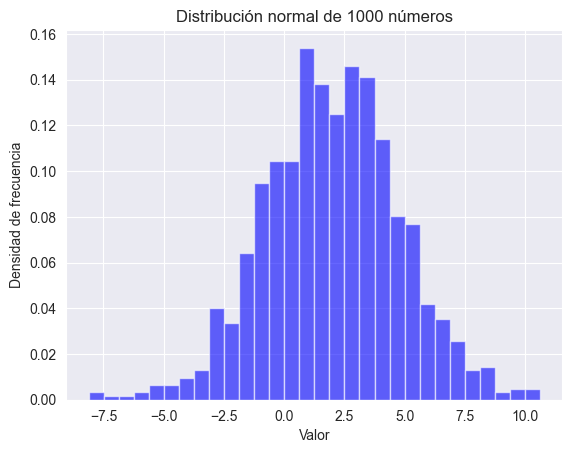

In [102]:
import numpy as np
import matplotlib.pyplot as plt
mu = entero_aleatorio # Media
sigma = flotante_aleatorio  # Desviación estándar

# Generar un array de 1000 números con distribución normal
data = np.random.normal(mu, sigma, 1000)

print(data)
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')
plt.title("Distribución normal de 1000 números")
plt.xlabel("Valor")
plt.ylabel("Densidad de frecuencia")
plt.show()

3. calcular el valor de 1sigma, 2sigma y 3sigma

In [103]:
mu=entero_aleatorio
sigma=flotante_aleatorio
rango_1sigma = (mu - sigma, mu + sigma)
rango_2sigma = (mu - 2 * sigma, mu + 2 * sigma)
rango_3sigma = (mu - 3 * sigma, mu + 3 * sigma)
print("Valor de mu (media):", mu)
print("Valor de sigma (desviación estándar):", sigma)
print("Rango de 1σ:", rango_1sigma)
print("Rango de 2σ:", rango_2sigma)
print("Rango de 3σ:", rango_3sigma)

Valor de mu (media): 2
Valor de sigma (desviación estándar): 2.756897507517177
Rango de 1σ: (-0.7568975075171771, 4.756897507517177)
Rango de 2σ: (-3.513795015034354, 7.513795015034354)
Rango de 3σ: (-6.270692522551531, 10.270692522551531)


6., 7., y 8. Calcular el porcentaje de número que están en el rango, [-1sigma, 1sigma], [-2sigma,2sigma] y [-3sigma,3sigma]

In [104]:
en_1sigma = np.sum((data >= rango_1sigma[0]) & (data <= rango_1sigma[1])) / len(data) * 100
en_2sigma = np.sum((data >= rango_2sigma[0]) & (data <= rango_2sigma[1])) / len(data) * 100
en_3sigma = np.sum((data >= rango_3sigma[0]) & (data <= rango_3sigma[1])) / len(data) * 100

# Imprimir los resultados
print("Porcentaje de números en el rango de 1σ:", en_1sigma, "%")
print("Porcentaje de números en el rango de 2σ:", en_2sigma, "%")
print("Porcentaje de números en el rango de 3σ:", en_3sigma, "%")

Porcentaje de números en el rango de 1σ: 69.1 %
Porcentaje de números en el rango de 2σ: 95.5 %
Porcentaje de números en el rango de 3σ: 99.5 %


9. Crear una función que reciba un entero (mu), un flotante (sigma) y un entero (total de números) y: genere array de números con distribución normal, con mu, y sigma. Plotee la distribución, calcule los sigmas, calcule el porcentaje de números que están en los rangos de +-1sigmam +-2sigma, +-3sigma

Array de numeros
[ 3.34146997e+00  1.60476005e+00  1.17732094e+00 -1.98761905e-01
  7.87196821e-01  1.69614978e+00 -1.79697455e-01  2.13987583e+00
  7.81413941e-01  1.96047525e+00  2.51662903e+00  1.54381450e+00
 -1.16087348e-01  1.69032913e+00  2.13889554e+00  2.22397773e+00
  2.56661780e+00  4.05949348e+00  4.04008678e-01  4.84012917e+00
  4.18286114e-01  2.74918388e+00  4.09167890e+00  4.74124065e-01
  5.05740385e+00  4.12130775e+00  1.58763596e+00  3.16242168e+00
 -1.96812317e+00 -1.07304085e-01 -5.68558182e-01  4.84185679e+00
  2.32389642e+00  3.16915768e+00  1.39427602e+00  5.48763927e-01
  2.77554801e+00  1.31627690e+00  1.95135410e+00 -2.34934286e+00
  4.16953620e+00  1.31680677e+00  1.33966567e-01  3.31050636e+00
  1.40281319e+00  6.76212455e-01 -1.49186487e+00  4.16504060e+00
  2.82787422e+00  5.14704882e+00  2.50746326e+00  4.62561794e-02
  5.88286397e+00 -4.82712796e-01  1.85587741e+00  1.73245686e+00
 -1.04143209e+00  3.24169158e+00  2.79230268e+00  1.16691961e+00
  5.2046

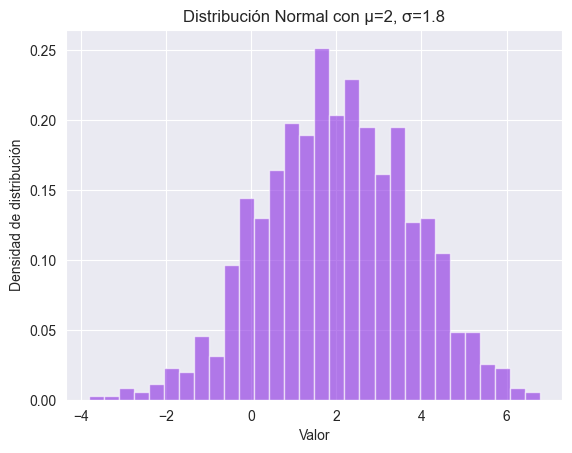

In [111]:
def distribucion_normal(mu, sigma, total_numeros):
    #distribucion
    datos = np.random.normal(mu, sigma, total_numeros)

    #array 
    print("Array de numeros")
    print(datos)
    
    # Plotear la distribución
    plt.hist(datos, bins=30, density=True, alpha=0.6, color='blueviolet')
    plt.title(f'Distribución Normal con μ={mu}, σ={sigma}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad de distribución')
    plt.grid(True)

    # Calcular los rangos de +-1sigma, +-2sigma y 3+-sigma
    sigma1 = np.sum((datos >= (mu - sigma)) & (datos <= (mu + sigma))) / total_numeros * 100
    sigma2 = np.sum((datos >= (mu - 2 * sigma)) & (datos <= (mu + 2 * sigma))) / total_numeros * 100
    sigma3 = np.sum((datos >= (mu - 3 * sigma)) & (datos <= (mu + 3 * sigma))) / total_numeros * 100

    # Imprimimos sigmas y porcentaje de numeros que están en los rangos de sigmas
    print(f'Media (μ): {mu:.2f}')
    print(f'Desviación Estándar (σ): {sigma:.2f}')
    print(f'Porcentaje de datos dentro de ±1σ: {sigma1:.2f}%')
    print(f'Porcentaje de datos dentro de ±2σ: {sigma2:.2f}%')
    print(f'Porcentaje de datos dentro de ±3σ: {sigma3:.2f}%')

    # Mostrar la gráfica
    plt.show()

# Función en uso
distribucion_normal(mu=2, sigma=1.8, total_numeros=1000)

2. Usar la función anterior con los valores (0, 1., 1000), (3, 5, 5000), (-3, 3, 10000

Array de numeros
[ 6.27606453e-02 -4.59255403e-01 -9.17503099e-02 -1.33832886e+00
 -3.90182012e-01 -1.65193256e+00  1.69855424e+00 -3.13526459e-01
 -1.95467100e+00 -2.48333067e+00 -3.88989792e-01  3.40819033e-01
  8.39772988e-01  7.29047838e-01 -1.11192995e-02 -3.44544407e-01
  7.35547299e-01 -7.08210535e-01 -7.19317127e-01  7.40208778e-01
  9.61926821e-01 -1.90237044e-01  4.72212392e-02 -1.04041184e-01
 -1.87321219e+00  8.73115539e-01 -8.64728313e-01  2.41672913e-01
  3.99097523e-01 -1.52589134e+00  1.74417313e-01  1.38394743e+00
 -3.33005334e-01 -1.72437818e+00 -4.83680268e-01 -1.29038597e-01
  1.57607885e+00  5.82250278e-01 -2.53228505e-01  9.07864128e-01
  1.28627941e+00 -1.06534648e-01  1.38626762e+00 -1.92120106e+00
  1.08079051e-01 -4.57923486e-01  3.99772797e-01  1.56006146e+00
  5.70607372e-01  1.90787459e-01  1.07409730e+00 -2.34294532e+00
  5.90611180e-01 -8.56455535e-02 -4.06587044e-01 -9.88091399e-02
 -3.83121958e-01  9.59147262e-01 -1.22640674e-01 -5.65720842e-01
 -5.7100

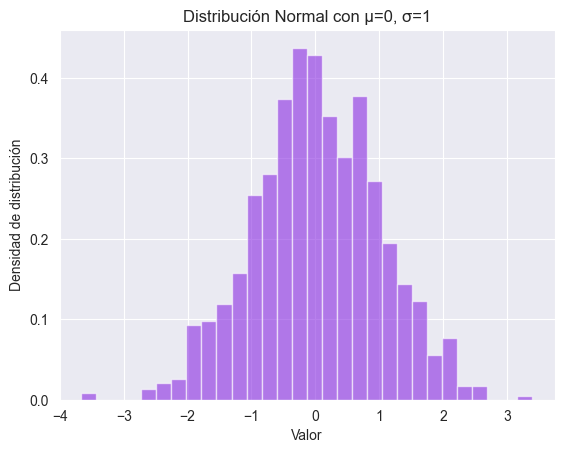

Array de numeros
[ 6.99394297  1.24357708  0.22507217 ... 10.40547885 -1.08401952
  1.16447941]
Media (μ): 3.00
Desviación Estándar (σ): 5.00
Porcentaje de datos dentro de ±1σ: 69.10%
Porcentaje de datos dentro de ±2σ: 96.06%
Porcentaje de datos dentro de ±3σ: 99.84%


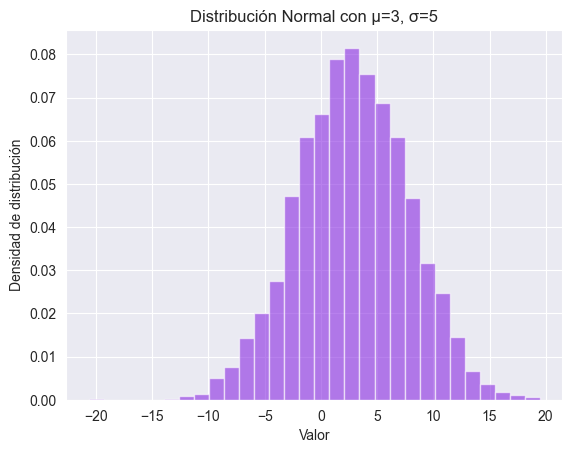

Array de numeros
[ -3.78464547  -3.70314898  -3.74091754 ...   0.77068866 -11.2147082
  -6.57584359]
Media (μ): -3.00
Desviación Estándar (σ): 3.00
Porcentaje de datos dentro de ±1σ: 68.70%
Porcentaje de datos dentro de ±2σ: 95.18%
Porcentaje de datos dentro de ±3σ: 99.62%


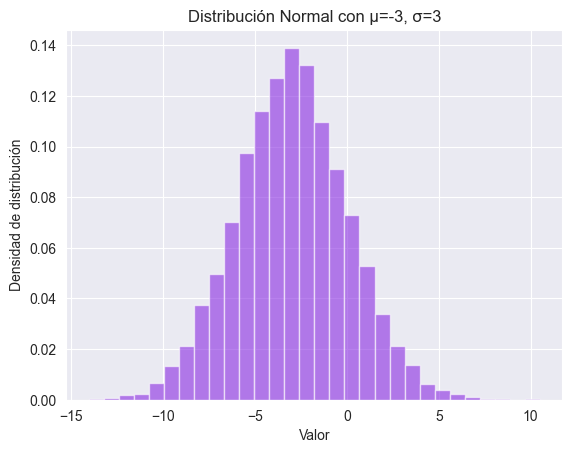

In [112]:
distribucion_normal(mu=0, sigma=1, total_numeros=1000)
distribucion_normal(mu=3, sigma=5, total_numeros=5000)
distribucion_normal(mu=-3, sigma=3, total_numeros=10000)